<a href="https://colab.research.google.com/github/sttsenov/solar_flare_classification/blob/main/Solar_Flare_Sequnetial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q sklearn

In [2]:
import numpy as np
import pandas as pd
import keras
from keras import Sequential
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [3]:
dataframe = pd.read_excel('Solar_Flares_Dataset.xlsx')

In [4]:
dataframe.head()

,modified Zurich class,largest spot size,spot distribution,Activity,Evolution,Previous 24 hour flare activity code,Historically-complex,Did region become historically complex on this pass across the sun's disk,Area,. Area of the largest spot,C-Class Flares,M-class flares,X-class flares
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
## Ex: Select C-Class Flares as your target

X = dataframe.iloc[:, 0:-3]
y = dataframe.iloc[:, 10:13]

print('X_shape is', X.shape, 'and y_shape is', y.shape)

X_shape is (1066, 10) and y_shape is (1066, 3)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [55]:
from sklearn.preprocessing import OrdinalEncoder
enc_all = OrdinalEncoder()
X_train_cat = X_train.copy().iloc[:, 0:3]
enc_all.fit(X_train_cat)
enc_all.categories_

[array(['B', 'C', 'D', 'E', 'F', 'H'], dtype=object),
 array(['A', 'H', 'K', 'R', 'S', 'X'], dtype=object),
 array(['C', 'I', 'O', 'X'], dtype=object)]

In [56]:
# transform
X_train_cat_enc = enc_all.transform(X_train_cat)

X_train_cat_enc

array([[1., 0., 2.],
       [2., 4., 2.],
       [1., 4., 2.],
       ...,
       [3., 2., 0.],
       [4., 2., 1.],
       [1., 4., 2.]])

In [57]:
X_train.loc[:, ['modified Zurich class']] = X_train_cat_enc[:, 0]
X_train.loc[:, ["largest spot size"]] = X_train_cat_enc[:, 1]
X_train.loc[:, ["spot distribution"]] = X_train_cat_enc[:, 2]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [58]:
X_test_cat = X_test.copy().iloc[:, 0:3]
X_test_cat_enc = enc_all.transform(X_test_cat)

In [59]:
X_test.loc[:, ['modified Zurich class']] = X_test_cat_enc[:, 0]
X_test.loc[:, ["largest spot size"]] = X_test_cat_enc[:, 1]
X_test.loc[:, ["spot distribution"]] = X_test_cat_enc[:, 2]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [60]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_test.head()

X_train shape (746, 10)
X_test shape (320, 10)


,modified Zurich class,largest spot size,spot distribution,Activity,Evolution,Previous 24 hour flare activity code,Historically-complex,Did region become historically complex on this pass across the sun's disk,Area,. Area of the largest spot
331,1.0,3.0,2.0,1,3,1,1,2,1,1
467,0.0,5.0,2.0,1,2,1,1,2,1,1
533,1.0,0.0,1.0,2,3,1,2,2,1,1
60,2.0,0.0,1.0,2,2,1,2,2,1,1
71,2.0,0.0,2.0,1,2,1,2,2,1,1


In [13]:
model = keras.Sequential([
      keras.layers.Dense(
          20, input_dim=10, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(3, activation='softmax'),
  ])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
24/24 [==============================] - 1s 1ms/step - loss: 0.3852 - accuracy: 0.7867
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.7182
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.6296
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.6395
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.5993
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.6516
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.6398
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.6145
Epoch 9/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.6272
Epoch 10/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.6370

In [15]:
pred_train= model.predict(X_train.values)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test.values)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

Accuracy on training data: 0.9825737476348877% 
 Error on training data: 0.017426252365112305
Accuracy on test data: 0.9781249761581421% 
 Error on test data: 0.02187502384185791


dict_keys(['loss', 'accuracy'])


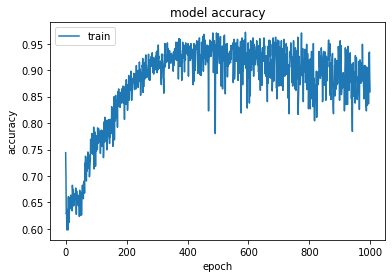

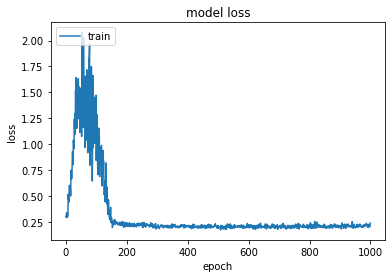

In [16]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, precision_score , recall_score
from sklearn.metrics import classification_report

y_val_pred = (model.predict(X_test) > 0.5).astype("int32")
y_val_train = (model.predict(X_test)).astype("int32")


print("------------------------OVERALL----------------------------------------")

print("Accuracy: ", accuracy_score(y_test.values.ravel(), y_val_train.ravel()))
print("Precision: ", precision_score(y_test.values.ravel(), y_val_train.ravel(), average='weighted'))
print("Recall: ", recall_score(y_test.values.ravel(), y_val_train.ravel(), average='weighted'))

print("------------------------POSITIVE--------------------------------------")

print("Accuracy: ", accuracy_score(y_test.values.ravel(), y_val_pred.ravel()))
print("Precision: ", precision_score(y_test.values.ravel(), y_val_pred.ravel(), average='weighted'))
print("Recall: ", recall_score(y_test.values.ravel(), y_val_pred.ravel(), average='weighted'))

------------------------OVERALL----------------------------------------
Accuracy:  0.928125
Precision:  0.861416015625
Recall:  0.928125
------------------------POSITIVE--------------------------------------
Accuracy:  0.68125
Precision:  0.9090234375
Recall:  0.68125


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
test_data = pd.read_excel('flare2.xlsx')

In [19]:
test_data.head()

,modified Zurich class,largest spot size,spot distribution,Activity,Evolution,Previous 24 hour flare activity code,Historically-complex,Did region become historically complex on this pass across the sun's disk,Area,Area of the largest spot,C-Class Flares,M-class flares,X-class flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
## Ex: Select C-Class Flares as your target

X2 = test_data.iloc[:, 0:-3]
y2 = test_data.iloc[:, 10:13]

print('X_shape is', X2.shape, 'and y_shape is', y2.shape)

X_shape is (323, 10) and y_shape is (323, 3)


In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=5)

In [22]:

enc_all2 = OrdinalEncoder()
X_train_cat2 = X_train2.copy().iloc[:, 0:3]
enc_all2.fit(X_train_cat2)
enc_all2.categories_

# transform
X_train_cat_enc2 = enc_all2.transform(X_train_cat2)

X_train_cat_enc2

X_train2.loc[:, ['modified Zurich class']] = X_train_cat_enc2[:, 0]
X_train2.loc[:, ["largest spot size"]] = X_train_cat_enc2[:, 1]
X_train2.loc[:, ["spot distribution"]] = X_train_cat_enc2[:, 2]

X_test_cat2 = X_test2.copy().iloc[:, 0:3]
X_test_cat_enc2 = enc_all2.transform(X_test_cat2)

X_test2.loc[:, ['modified Zurich class']] = X_test_cat_enc2[:, 0]
X_test2.loc[:, ["largest spot size"]] = X_test_cat_enc2[:, 1]
X_test2.loc[:, ["spot distribution"]] = X_test_cat_enc2[:, 2]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [23]:
pred_train= model.predict(X_train2.values)
scores = model.evaluate(X_train2, y_train2, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1])) 

Accuracy on training data: 0.9424778819084167% 
 Error on training data: 0.05752211809158325


In [24]:
pred_train= model.predict(X_test2.values)
scores = model.evaluate(X_test2, y_test2, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1])) 

Accuracy on training data: 0.8659793734550476% 
 Error on training data: 0.1340206265449524


In [25]:
print('X_train shape', X_train2.shape)
print('X_test shape', X_test2.shape)

X_train shape (226, 10)
X_test shape (97, 10)


In [26]:
from sklearn.metrics import accuracy_score, precision_score , recall_score
from sklearn.metrics import classification_report

y_val_pred = (model.predict(X_test2) > 0.5).astype("int32")
y_val_train = (model.predict(X_test2)).astype("int32")


print("------------------------OVERALL----------------------------------------")

print("Accuracy: ", accuracy_score(y_test2.values.ravel(), y_val_train.ravel()))
print("Precision: ", precision_score(y_test2.values.ravel(), y_val_train.ravel(), average='weighted'))
print("Recall: ", recall_score(y_test2.values.ravel(), y_val_train.ravel(), average='weighted'))

print("------------------------POSITIVE--------------------------------------")

print("Accuracy: ", accuracy_score(y_test2.values.ravel(), y_val_pred.ravel()))
print("Precision: ", precision_score(y_test2.values.ravel(), y_val_pred.ravel(), average='weighted'))
print("Recall: ", recall_score(y_test2.values.ravel(), y_val_pred.ravel(), average='weighted'))

------------------------OVERALL----------------------------------------
Accuracy:  0.8934707903780069
Precision:  0.7982900532587003
Recall:  0.8934707903780069
------------------------POSITIVE--------------------------------------
Accuracy:  0.6323024054982818
Precision:  0.8136181670032239
Recall:  0.6323024054982818


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
pip install eli5

     |████████████████████████████████| 112kB 6.5MB/s 


In [85]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import cross_val_score, KFold

estimator = KerasRegressor(lambda: model)    

estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)


24/24 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.8753


In [86]:
perm = PermutationImportance(estimator, random_state=5).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

24/24 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9826


Weight,Feature
0.0008 ± 0.0006,Activity
0.0007 ± 0.0013,modified Zurich class
0.0005 ± 0.0008,Did region become historically complex on this pass across the sun's disk
0.0004 ± 0.0009,Historically-complex
0.0003 ± 0.0007,Previous 24 hour flare activity code
0.0002 ± 0.0014,spot distribution
0 ± 0.0000,. Area of the largest spot
-0.0001 ± 0.0010,Evolution
-0.0005 ± 0.0004,Area
-0.0021 ± 0.0029,largest spot size


In [91]:
k = 5
kf = KFold(n_splits=k, random_state=None)

m_model = KerasClassifier(lambda: model)  

result = cross_val_score(m_model , X_test, y_test, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

2/2 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.9844
Avg accuracy: 0.978125
